<!--BOOK_INFORMATION-->
<img align="left" style="padding-right:10px;" src="images/book_cover.jpg" width="120">

*This notebook contains an excerpt from the [Python Programming and Numerical Methods - A Guide for Engineers and Scientists](https://www.elsevier.com/books/python-programming-and-numerical-methods/kong/978-0-12-819549-9), the content is also available at [Berkeley Python Numerical Methods](https://pythonnumericalmethods.berkeley.edu/notebooks/Index.html).*

*The copyright of the book belongs to Elsevier. We also have this interactive book online for a better learning experience. The code is released under the [MIT license](https://opensource.org/licenses/MIT). If you find this content useful, please consider supporting the work on [Elsevier](https://www.elsevier.com/books/python-programming-and-numerical-methods/kong/978-0-12-819549-9) or [Amazon](https://www.amazon.com/Python-Programming-Numerical-Methods-Scientists/dp/0128195495/ref=sr_1_1?dchild=1&keywords=Python+Programming+and+Numerical+Methods+-+A+Guide+for+Engineers+and+Scientists&qid=1604761352&sr=8-1)!*

<!--NAVIGATION-->
< [22.2 Reduction of Order](chapter22.02-Reduction-of-Order.ipynb) | [Contents](Index.ipynb) | [22.4 Numerical Error and Instability](chapter22.04-Numerical-Error-and-Instability.ipynb) >

# The Euler Method

Let $\frac{dS(t)}{dt} = F(t,S(t))$ be an explicitly defined first order ODE. That is, $F$ is a function that returns the derivative, or change, of a state given a time and state value. Also, let $t$ be a numerical grid of the interval $[t_0, t_f]$ with spacing $h$. Without loss of generality, we assume that $t_0 = 0$, and that $t_f = Nh$ for some positive integer, $N$.


The linear approximation of $S(t)$ around $t_j$ at $t_{j+1}$ is

$$
S(t_{j+1}) = S(t_j) + (t_{j+1} - t_j)\frac{dS(t_j)}{dt},
$$

which can also be written

$$
S(t_{j+1}) = S(t_j) + hF(t_j, S(t_j)).
$$

This formula is called the **Explicit Euler Formula**, and it allows us to compute an approximation for the state at $S(t_{j+1})$ given the state at $S(t_j)$. Starting from a given initial value of $S_0 = S(t_0)$, we can use this formula to integrate the states up to $S(t_f)$; these $S(t)$ values are then an approximation for the solution of the differential equation. The Explicit Euler formula is the simplest and most intuitive method for solving initial value problems. At any state $(t_j, S(t_j))$ it uses $F$ at that state to "point" toward the next state and then moves in that direction a distance of $h$. Although there are more sophisticated and accurate methods for solving these problems, they all have the same fundamental structure. As such, we enumerate explicitly the steps for solving an initial value problem using the Explicit Euler formula.

<img src="images/22.03.01-Euler-method-illustration.png" alt="explicit Euler" title="The illustration of the explicit Euler method." width="500"/>

**WHAT IS HAPPENING?** Assume we are given a function $F(t, S(t))$ that computes $\frac{dS(t)}{dt}$, a numerical grid, $t$, of the interval, $[t_0, t_f]$, and an initial state value $S_0 = S(t_0)$. We can compute $S(t_j)$ for every $t_j$ in $t$ using the following steps.

1. Store $S_0 = S(t_0)$ in an array, $S$.
2. Compute $S(t_1) = S_0 + hF(t_0, S_0)$.
3. Store $S_1 = S(t_1)$ in $S$.
4. Compute $S(t_2) = S_1 + hF(t_1, S_1)$.
5. Store $S_2 = S(t_1)$ in $S$.
6. $\cdots$
7. Compute $S(t_f) = S_{f-1} + hF(t_{f-1}, S_{f-1})$.
8. Store $S_f = S(t_f)$ in $S$.
9. $S$ is an approximation of the solution to the initial value problem.

When using a method with this structure, we say the method **integrates** the solution of the ODE.

**TRY IT!** The differential equation $\frac{df(t)}{dt} = e^{-t}$ with initial condition $f_0 = -1$ has the exact solution $f(t) = -e^{-t}$. Approximate the solution to this initial value problem between 0 and 1 in increments of 0.1 using the Explicity Euler Formula. Plot the difference between the approximated solution and the exact solution. 

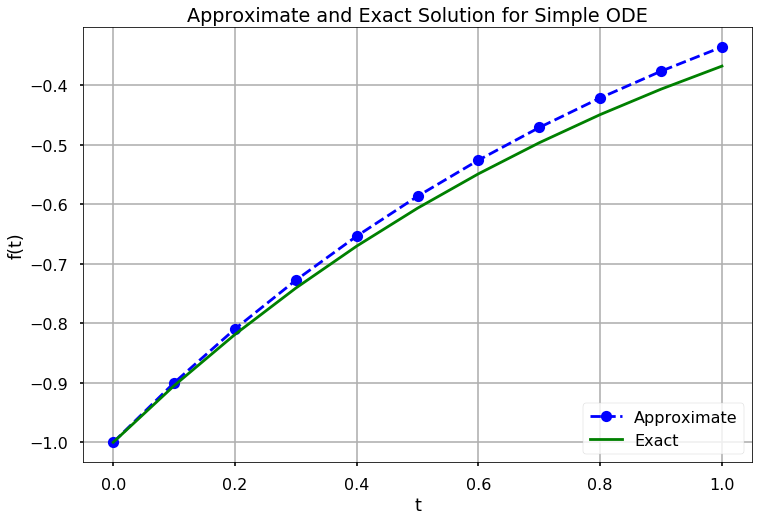

In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')
%matplotlib inline

# Define parameters
f = lambda t, s: np.exp(-t) # ODE
h = 0.1 # Step size
t = np.arange(0, 1 + h, h) # Numerical grid
s0 = -1 # Initial Condition

# Explicit Euler Method
s = np.zeros(len(t))
s[0] = s0

for i in range(0, len(t) - 1):
    s[i + 1] = s[i] + h*f(t[i], s[i])

plt.figure(figsize = (12, 8))
plt.plot(t, s, 'bo--', label='Approximate')
plt.plot(t, -np.exp(-t), 'g', label='Exact')
plt.title('Approximate and Exact Solution \
for Simple ODE')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.grid()
plt.legend(loc='lower right')
plt.show()

In the above figure, we can see each dot is one approximation based on the previous dot in a linear fashion. From the initial value, we can eventually get an approximation of the solution on the numerical grid. If we repeat the process for $h = 0.01$, we get a better approximation for the solution:

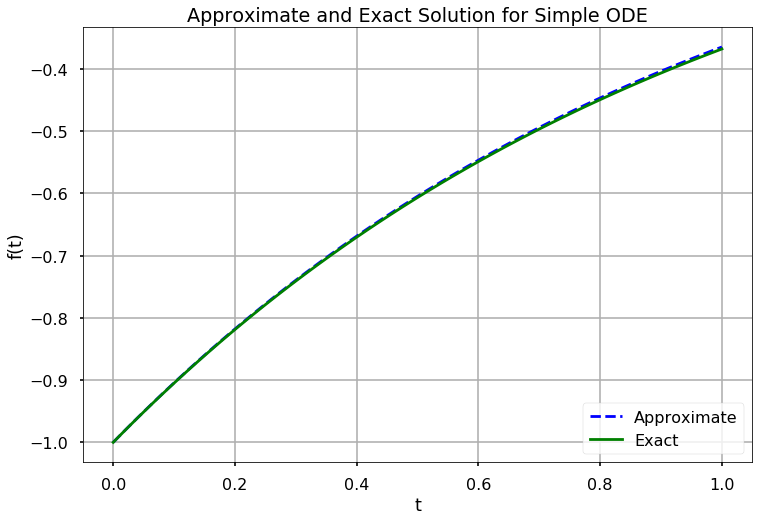

In [2]:
h = 0.01 # Step size
t = np.arange(0, 1 + h, h) # Numerical grid
s0 = -1 # Initial Condition

# Explicit Euler Method
s = np.zeros(len(t))
s[0] = s0

for i in range(0, len(t) - 1):
    s[i + 1] = s[i] + h*f(t[i], s[i])

plt.figure(figsize = (12, 8))
plt.plot(t, s, 'b--', label='Approximate')
plt.plot(t, -np.exp(-t), 'g', label='Exact')
plt.title('Approximate and Exact Solution \
for Simple ODE')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.grid()
plt.legend(loc='lower right')
plt.show()

The Explicit Euler Formula is called "explicit" because it only requires information at $t_j$ to compute the state at $t_{j+1}$. That is, $S(t_{j+1})$ can be written explicitly in terms of values we have (i.e., $t_j$ and $S(t_j)$). The **Implicit Euler Formula** can be derived by taking the linear approximation of $S(t)$ around $t_{j+1}$ and computing it at $t_j$:

$$
S(t_{j+1}) = S(t_j) + hF(t_{j+1}, S(t_{j+1})).
$$

This formula is peculiar because it requires that we know $S(t_{j+1})$ to compute $S(t_{j+1})$! However, it happens that sometimes we *can* use this formula to approximate the solution to initial value problems. Before we give details on how to solve these problems using the Implicit Euler Formula, we give another implicit formula called the **Trapezoidal Formula**, which is the average of the Explicit and Implicit Euler Formulas:

$$
S(t_{j+1}) = S(t_j) + \frac{h}{2}(F(t_j, S(t_j)) + F(t_{j+1}, S(t_{j+1}))).
$$

To illustrate how to solve these implicit schemes, consider again the pendulum equation, which has been reduced to first order.

$$
\frac{dS(t)}{dt} =\left[\begin{array}{cc}
0 & 1 \\
-\frac{g}{l} & 0
\end{array}\right]S(t)
$$

For this equation,

$$
F(t_j, S(t_j)) =\left[\begin{array}{cc}
0 & 1 \\
-\frac{g}{l} & 0
\end{array}\right]S(t_j).
$$

If we plug this expression into the Explicit Euler Formula, we get the following equation:

$$
S(t_{j+1}) = S(t_j) + h \left[\begin{array}{cc}
0 & 1 \\
-\frac{g}{l} & 0
\end{array}\right]S(t_j) = \left[\begin{array}{cc}
1 & 0 \\
0 & 1
\end{array}\right]S(t_j) + h\left[\begin{array}{cc}
0 & 1 \\
-\frac{g}{l} & 0
\end{array}\right]S(t_j)= \left[\begin{array}{cc}
1 & h \\
-\frac{gh}{l} & 1
\end{array}\right]S(t_j)
$$

Similarly, we can plug the same expression into the Implicit Euler to get

$$
\left[\begin{array}{cc}
1 & -h \\
\frac{gh}{l} & 1
\end{array}\right]S(t_{j+1}) = S(t_j),
$$

and into the Trapezoidal Formula to get

$$
\left[\begin{array}{cc}
1 & -\frac{h}{2} \\
\frac{gh}{2l} & 1
\end{array}\right]S(t_{j+1}) = \left[\begin{array}{cc}
1 & \frac{h}{2} \\
-\frac{gh}{2l} & 1
\end{array}\right]S(t_j).
$$

With some rearrangement, these equations become, respectively,

$$
\begin{eqnarray*}
&& S(t_{j+1}) = \left[\begin{array}{cc}
1 & -h \\
\frac{gh}{l} & 1
\end{array}\right]^{-1} S(t_j),\\
&& S(t_{j+1}) = \left[\begin{array}{cc}
1 & -\frac{h}{2} \\
\frac{gh}{2l} & 1
\end{array}\right]^{-1}\left[\begin{array}{cc}
1 & \frac{h}{2} \\
-\frac{gh}{2l} & 1
\end{array}\right]S(t_j).
\end{eqnarray*}
$$
These equations allow us to solve the initial value problem, since at each state, $S(t_j)$, we can compute the next state at $S(t_{j+1})$. In general, this is possible to do when an ODE is linear.


<!--NAVIGATION-->
< [22.2 Reduction of Order](chapter22.02-Reduction-of-Order.ipynb) | [Contents](Index.ipynb) | [22.4 Numerical Error and Instability](chapter22.04-Numerical-Error-and-Instability.ipynb) >